# Plot of SST for S-MODE IOP2



In [1]:
#!conda create --name try_again
#!conda activate try_again
#!conda install  -y -c conda-forge numpy pandas xarray matplotlib cartopy jupyterlab h5netcdf dask netCDF4 bottleneck notebook jupyter ipympl netcdf4 h5netcdf scipy pydap zarr fsspec cftime rasterio cfgrib pooch cmocean

#!mamba install -y numpy pandas xarray matplotlib cartopy jupyterlab h5netcdf dask netCDF4 bottleneck notebook jupyter ipympl netcdf4 h5netcdf scipy pydap zarr cmocean

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cftime
import copy

import cartopy.crs as ccrs                   # import projections
from cartopy.io.shapereader import Reader
import cartopy
import gsw
import functions  # requires functions.py from this repository
import datetime

import sys
sys.path.insert(0,'../../NASA_SMODE/DataSynthesis/tools') #github repo in NASA_SMODE organization
sys.path.insert(0,'../../NASA_SMODE/DataSynthesis/data-synthesis/')
# from mapping_tools import *
# from tools import *

In [3]:
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 600
#plt.close('all')

%matplotlib inline
%matplotlib widget
# %matplotlib qt5

__figdir__ = '../plots/' 
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

In [4]:
f = gsw.geostrophy.f(37)
inertial_period = 2*np.pi/f/3600
print('Inertial period is '+ f'{inertial_period:.1f}' + ' hours')

Inertial period is 19.9 hours


In [5]:
# 2023 IOP2

url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP1_2022/satellite/MODIS_Aqua/MODIS_Aqua_20221019T102002Z.nc'; V = [14, 18]; zoom = 1 
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/AVHRR_METOPC/AVHRR_METOPC_20230406T043000Z.nc'; V = [9, 12.5]; zoom = 0 
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/AVHRR_METOPC/AVHRR_METOPC_20230409T051000Z.nc'; V = [9, 13.5]; zoom = 1
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_N20/VIIRS_N20_20230409T101000Z.nc'; V = [9.5, 12.75]; zoom = 1

# These two images are really clear and close in time (50 minutes=3000 s); if speeds are 0.1 m/s, displacements are 300 m
#http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_N20/VIIRS_N20_20230409T101000Z.nc
#http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_NPP/VIIRS_NPP_20230409T110000Z.nc
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_N20/VIIRS_N20_20230409T101000Z.nc'; V = [9.5, 13.75]; zoom = 0
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/AVHRR_METOPB/AVHRR_METOPB_20230411T174000Z.nc'; V = [9.5, 13]; zoom = 0

url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_N20/VIIRS_N20_20230412T091000Z.nc'; V = [10.75, 12.75]; zoom = 1
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/MODIS_Terra/MODIS_Terra_20230413T060002Z.nc'; V = [10.75, 12.75]; zoom = 1
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_NPP/VIIRS_NPP_20230416T215000Z.nc'; V = [10.75, 12.75]; zoom = 2
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_N20/VIIRS_N20_20230416T210000Z.nc'; V = [10.75, 12.75]; zoom = 2
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_N20/VIIRS_N20_20230418T090000Z.nc'; V = [10.0, 12.50]; zoom = 1
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_NPP/VIIRS_NPP_20230418T095000Z.nc'; V = [10.0, 12.50]; zoom = 1
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/AVHRR_METOPC/AVHRR_METOPC_20230419T050000Z.nc'; V = [10.0, 12.50]; zoom = 1
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/AVHRR_METOPB/AVHRR_METOPB_20230420T053000Z.nc'; V = [10.0, 12.50]; zoom = 1
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/MODIS_Terra/MODIS_Terra_20230420T055002Z.nc'; V = [10.75, 13]; zoom = 1
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/MODIS_Terra/MODIS_Terra_20230420T055002Z.nc'; V = [11.1, 12.75]; zoom = 3
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/AVHRR_METOPC/AVHRR_METOPC_20230421T060000Z.nc'; V = [11.1, 13.5]; zoom = 1
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_N20/VIIRS_N20_20230421T095000Z.nc'; V = [10.75, 12.75]; zoom = 3
#url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_NPP/VIIRS_NPP_20230421T104000Z.nc'; V = [10., 13]; zoom = 1
#url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_N20/VIIRS_N20_20230421T095000Z.nc'; V = [10., 13]; zoom = 1
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_N20/VIIRS_N20_20230422T205000Z.nc'; V = [10.75, 12.75]; zoom = 3
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_N20/VIIRS_N20_20230424T103000Z.nc'; V = [10.75, 12.25]; zoom = 3
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/AVHRR_METOPB/AVHRR_METOPB_20230424T181000Z.nc'; V = [10., 11.7]; zoom = 3
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_N20/VIIRS_N20_20230426T095000Z.nc'; V = [10., 11.7]; zoom = 3
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/AVHRR_METOPC/AVHRR_METOPC_20230426T060000Z.nc'; V = [11.25, 13]; zoom = 3
url = 'http://smode.whoi.edu:8080/thredds/dodsC/IOP2_2023/satellite/VIIRS_N20/VIIRS_N20_20230427T093000Z.nc'; V = [11.25, 13]; zoom = 3

In [6]:
time_window = 20
zoom_str = 'zoom' + str(zoom)

In [7]:
# Flags/options
plot_SWOT = True
plot_assets = False
savefig = True

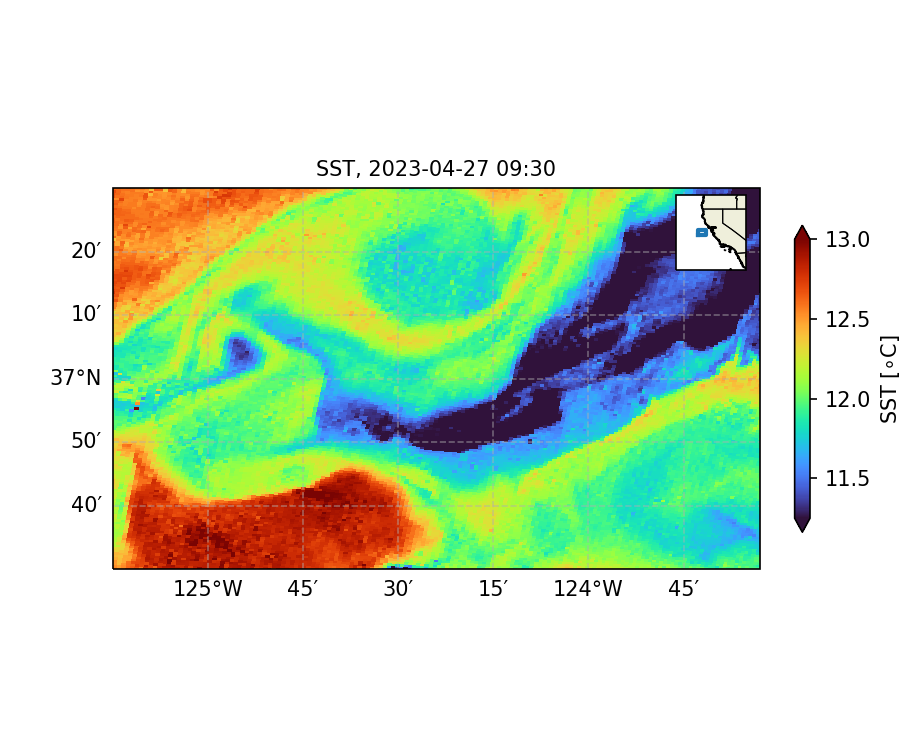

In [8]:
(ax, day_str) = functions.sst_map_SMODE(url,zoom,V,time_window)

In [9]:
# If doing this in real time, it can be relevant to plot current postions of assets
# If not real-time, it is not relevant
'''
sd = functions.get_current_position('saildrone')
ax.scatter(sd.longitude,sd.latitude,s=5,c='k',transform=ccrs.PlateCarree())
wg = functions.get_current_position('waveglider')
ax.scatter(wg.longitude,wg.latitude,s=5,c='m',transform=ccrs.PlateCarree())
''';

In [10]:

# Add a 10 km scale bar
km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
deg_lat_equal_10km=10/km_per_deg_lat
x0 = -124.25
y0 = 36.75
#ax.plot(x0+np.asarray([0, 0]),y0+np.asarray([np.asarray(0),deg_lat_equal_10km]),transform=ccrs.PlateCarree(),color='k')
ax.plot([x0,x0],[y0, y0+deg_lat_equal_10km.item()],transform=ccrs.PlateCarree(),color='k')
ax.text(x0+2/60, y0-.5/60, '10 km', fontsize=6,transform=ccrs.PlateCarree())


Text(-124.21666666666667, 36.74166666666667, '10 km')

In [11]:
# np.asarray([0, deg_lat_equal_10km])
[y0, y0+deg_lat_equal_10km.item()]

[36.75, 36.83993216059187]

In [12]:
if savefig:
    plt.savefig(__figdir__+'SST_assets2_zoom_level_' + str(zoom) + '_' + day_str + '.' + plotfiletype,**savefig_args)

In [13]:
file = '../data/external/aviso_IOP2.nc'
ssh = xr.open_dataset(file)

In [14]:
tind = np.flatnonzero(np.abs(ssh.time-np.datetime64(day_str))==np.min(np.abs(ssh.time-np.datetime64(day_str))))

In [15]:
ssh.time[tind]

<xarray.DataArray 'time' (time: 1)>
array(['2023-04-27T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-04-27
Attributes:
    axis:                 T
    long_name:            Time
    standard_name:        time
    _ChunkSizes:          1
    _CoordinateAxisType:  Time
    valid_min:            26402.0
    valid_max:            26784.0

In [16]:
scale = 5
#tind = -1
u = np.squeeze(ssh.ugos.isel(time=tind)) #dtype=object
v = np.squeeze(ssh.vgos.isel(time=tind))
Qgeo = ax.quiver(ssh.longitude.values,ssh.latitude.values, u.values, v.values,  scale_units='width', scale = scale, transform=ccrs.PlateCarree())
functions.plot_ops_area_IOP2(ax,transform=ccrs.PlateCarree(),color='k')


((-126.25, -123.99, -123.354, -122.92, -124.36, -124.16, -125.515, -126.25),
 (38.342, 37.707, 37.75, 37.0, 36.337, 36.0, 35.6, 38.342))

In [17]:
__figdir__

'../plots/'

In [18]:
Qgeo

In [19]:
## Add WG velocity vector

In [20]:
WG_list = ['WHOI22','WHOI32','WHOI43','STOKES', 'PLANCK', 'KELVIN', 'CARSON']
path='../data/raw/WG_NRT_IOP2/'

In [21]:
# Make a list of the files:
n=0
file_list = []
for WG in WG_list:
    file = path+'adcp_'+WG+'.nc'
    file_list.append(file)

In [22]:
file_list

['../data/raw/WG_NRT_IOP2/adcp_WHOI22.nc',
 '../data/raw/WG_NRT_IOP2/adcp_WHOI32.nc',
 '../data/raw/WG_NRT_IOP2/adcp_WHOI43.nc',
 '../data/raw/WG_NRT_IOP2/adcp_STOKES.nc',
 '../data/raw/WG_NRT_IOP2/adcp_PLANCK.nc',
 '../data/raw/WG_NRT_IOP2/adcp_KELVIN.nc',
 '../data/raw/WG_NRT_IOP2/adcp_CARSON.nc']

In [23]:
# Read in cleaned ADCP files from all WG
n=0
for WG in WG_list:
    file = file_list[n]
    varstr = 'adcp_'+WG
    locals()[varstr]=xr.open_dataset(file,decode_times=True) #Time and z already fixed in WG_realtime_cleanup.ipynb
    n=n+1
    print(file)
    

../data/raw/WG_NRT_IOP2/adcp_WHOI22.nc
../data/raw/WG_NRT_IOP2/adcp_WHOI32.nc
../data/raw/WG_NRT_IOP2/adcp_WHOI43.nc
../data/raw/WG_NRT_IOP2/adcp_STOKES.nc
../data/raw/WG_NRT_IOP2/adcp_PLANCK.nc
../data/raw/WG_NRT_IOP2/adcp_KELVIN.nc
../data/raw/WG_NRT_IOP2/adcp_CARSON.nc


In [24]:
t0 = np.datetime64('2023-04-17T12:00:00')
tmin = t0 - np.timedelta64(48,'h')#np.datetime64('now')
tmax = t0 + np.timedelta64(48,'h')#np.datetime64('now')
z0 = -4
skip = 10
# scale = 10


In [25]:

width = Qgeo.width
headwidth = Qgeo.headwidth
headlength = Qgeo.headlength
headaxislength = Qgeo.headaxislength


In [26]:
# Function to plot WG position and vel at time of SST image
def plot_WG_vel_vectors(ax,tmin,tmax,scale,skip, **kwargs):
    # List of WGs
    # Read in cleaned ADCP files from all WG
    width = 0.0015
    n=0
    for WG in WG_list:
        ds = eval('adcp_'+WG)
        tind = np.flatnonzero(np.logical_and(ds.time>tmin,ds.time<tmax))
        tind=tind[0:-1:skip]
        zind = np.flatnonzero(np.abs(ds.depth-z0)==np.min(np.abs(ds.depth-z0)))
        if tind.size==0:
            print('Skipping '+WG)
            continue
        else:
            if n == 0:
                Qgeo = ax.quiver(ds.Longitude[tind].values,ds.Latitude[tind].values,np.squeeze(ds.current_east[tind, zind].values),np.squeeze(ds.current_north[tind, zind].values),scale=scale,width = width,transform=ccrs.PlateCarree(),**kwargs)
                ax.scatter(ds.Longitude[tind[-1]].values,ds.Latitude[tind[-1]].values,s=5,color='k',transform=ccrs.PlateCarree())
                qk = ax.quiverkey(Qgeo, 0.2, 0.75, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E', coordinates='figure')
                width = Qgeo.width
                headwidth = Qgeo.headwidth
                headlength = Qgeo.headlength
                headaxislength = Qgeo.headaxislength
            else:
                Q = ax.quiver(ds.Longitude[tind].values,ds.Latitude[tind].values,np.squeeze(ds.current_east[tind, zind].values),np.squeeze(ds.current_north[tind, zind].values),scale=scale,transform=ccrs.PlateCarree(), width = width, headlength = headlength, headwidth = headwidth, headaxislength = headaxislength, **kwargs)
                ax.scatter(ds.Longitude[tind[-1]].values,ds.Latitude[tind[-1]].values,s=5,color='k',transform=ccrs.PlateCarree())
            n = n+1 #increment counter
            
    

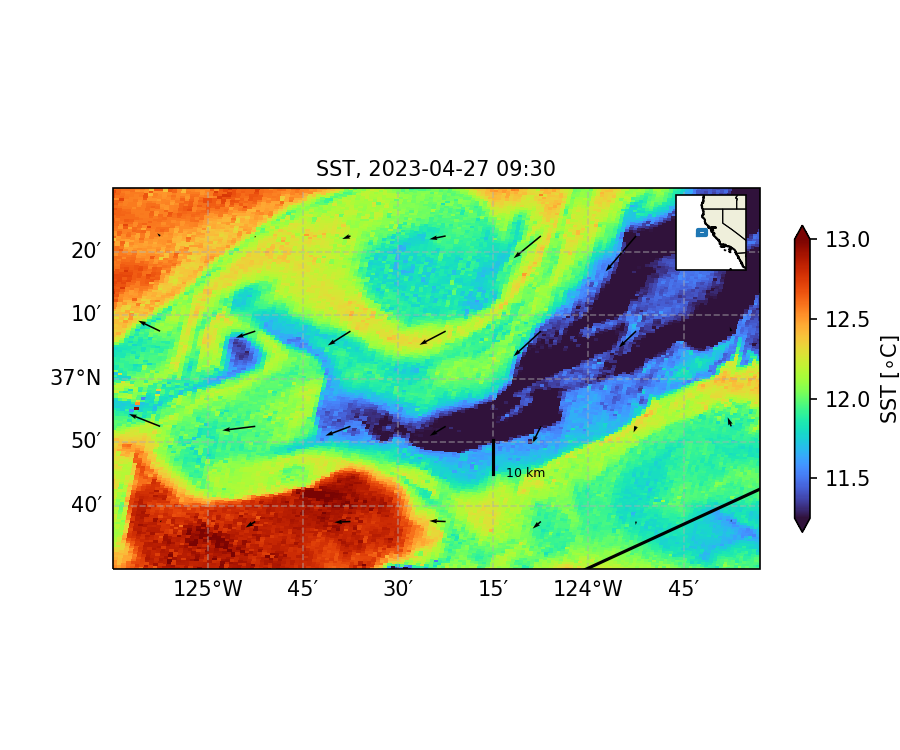

In [27]:
plt.show()

In [28]:
if savefig:
    plt.savefig(__figdir__+'SST_UV_zoom_level_' + str(zoom) + '_' + day_str + '.' + plotfiletype,**savefig_args)

In [29]:
if plot_assets:
    plot_WG_vel_vectors(ax,tmin,tmax,scale,skip,color='grey',edgecolor='k', linewidth = 1)
    if savefig:
        plt.savefig(__figdir__+'SST_UV_WG_zoom_level_' + str(zoom) + '_' + day_str + '.' + plotfiletype,**savefig_args)

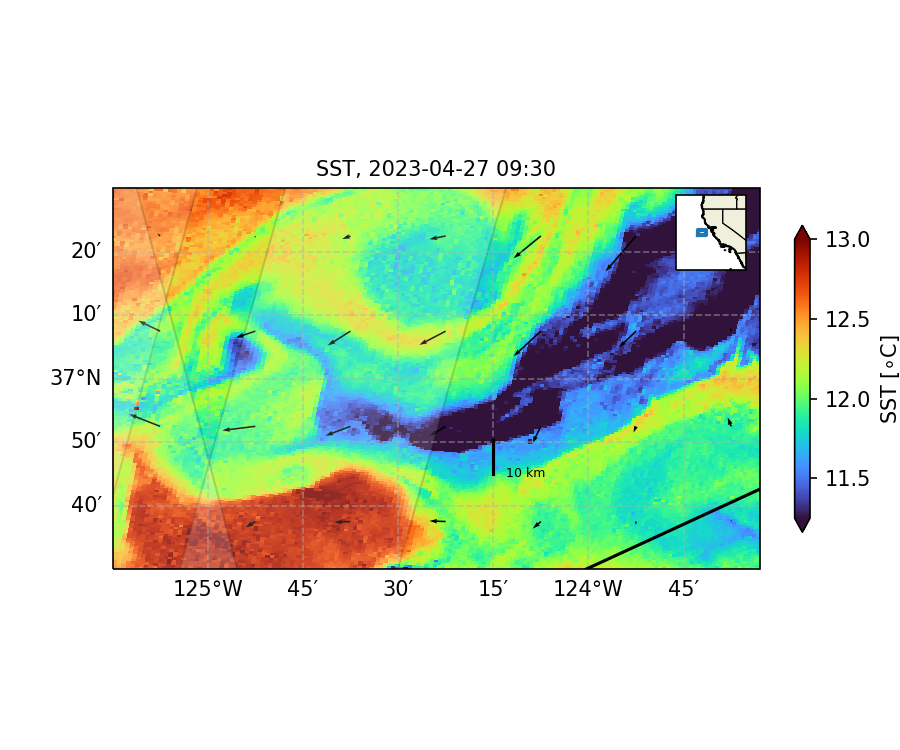

In [30]:
# add SWOT cal/val swath
if plot_SWOT:
    swot_file = "../../SWOT/orbit/sph_calval_swath/swot_calval_orbit_june2015-v2_swath.shp"
    nadir_file = "../../SWOT/orbit/shp_calval_nadir/swot_calval_orbit_june2015-v2_nadir.shp"
    ax.add_geometries(Reader(swot_file).geometries(), ccrs.PlateCarree(), facecolor='white',alpha=0.15,edgecolor='k')
    #ax.add_geometries(Reader(nadir_file).geometries(), ccrs.PlateCarree(), facecolor='k',edgecolor='k')
    #functions.plot_ops_area(ax,transform=ccrs.PlateCarree(),color='k')
    plt.show()
    if savefig:
        plt.savefig(__figdir__+'SST_UV_SWOT_swath_zoom_level_' + str(zoom) + '_' + day_str + '.' + plotfiletype,**savefig_args)